## get the class imbalances

In [1]:
import m_kipoi
from m_kipoi.exp.tfbinding.config import DATASETS
from tqdm import tqdm
import pandas as pd
import os
import numpy as np

In [34]:
dataset_info = []
for dataset, d in tqdm(DATASETS.items()):
    for tf,path in d['intervals'].items():
        df = pd.read_csv(os.path.join("../../", path), sep='\t', header=None)
        dataset_info.append({
            "dataset": dataset,
            "tf": tf,
            "n_positive": np.sum(df[3] == 1),
            "n_negative": np.sum(df[3] == 0),
            "n": len(df),
            "frac_positive": np.sum(df[3] == 1) / np.sum(df[3] != -1)
        })
df = pd.DataFrame(dataset_info)

100%|██████████| 5/5 [00:07<00:00,  1.37s/it]


In [35]:
df

,dataset,frac_positive,n,n_negative,n_positive,tf
0,kipoi,0.005017,1438101,1430886,7215,CEBPB
1,kipoi,0.003245,1438101,1433434,4667,JUND
2,kipoi,0.002249,1438101,1434867,3234,MAFK
3,kipoi,0.000617,1438101,1437214,887,NANOG
4,DREAM,0.006350,2905087,2826813,18065,CEBPB
5,DREAM,0.003364,2905087,2856718,9643,JUND
6,DREAM,0.001744,2905087,2865554,5007,MAFK
7,DREAM,0.000635,2905087,2881584,1832,NANOG
8,beer-300bp,0.002537,474545,473341,1204,CEBPB
9,beer-300bp,0.002310,480910,479799,1111,JUND


In [36]:
from plotnine import *

In [37]:
df.dataset.unique()

array(['kipoi', 'DREAM', 'beer-300bp', 'beer-1kb',
       'resized-beer-300bp-to-100bp'], dtype=object)

In [38]:
df['dataset'] = pd.Categorical(df.dataset, categories=df.dataset.unique())

In [39]:
# average values
df.groupby("dataset").mean()

,frac_positive,n,n_negative,n_positive
dataset,,,,
kipoi,0.002782,1438101.00,1434100.25,4000.75
DREAM,0.003023,2905087.00,2857667.25,8636.75
beer-300bp,0.002485,480489.75,479296.00,1193.75
beer-1kb,0.008570,139378.75,138185.00,1193.75
resized-beer-300bp-to-100bp,0.000828,1441469.25,1440275.50,1193.75


/opt/modules/i12g/anaconda/3-5.0.1/envs/kipoi-manuscript/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/opt/modules/i12g/anaconda/3-5.0.1/envs/kipoi-manuscript/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/opt/modules/i12g/anaconda/3-5.0.1/envs/kipoi-manuscript/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


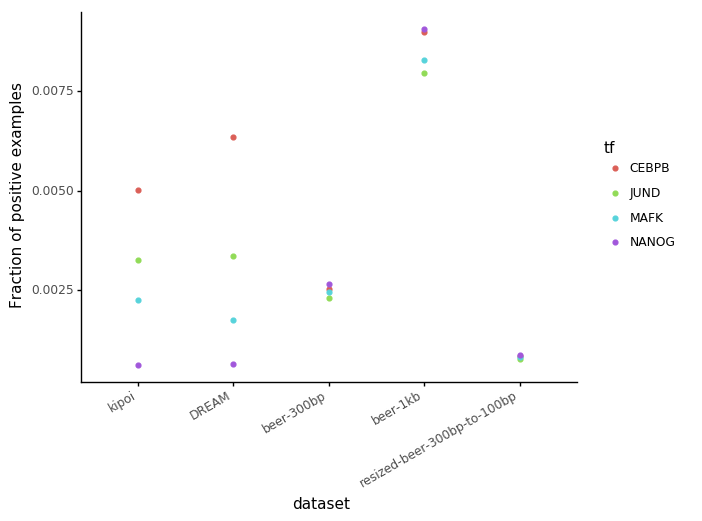

<ggplot: (8777759894038)>

In [26]:
(ggplot(aes(x='dataset', y='frac_positive', color='tf'), data=df) + 
 geom_point() + 
 theme_classic() + 
 theme(axis_text_x=element_text(rotation=30, hjust=1)) + 
 ylab("Fraction of positive examples")
)